<a href="https://colab.research.google.com/github/NguyenDacCuong2604/ML/blob/main/Lab_9_20130215_NguyenDacCuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main aim of this lab is to deal with the pipeline technique and MultilayerPerceptron algorithm

*   **Deadline: 23:59, 24/4/2023**



# Import libraries

In [1]:
# code
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=32)

#Task 1. With **iris** dataset
*  Apply **pipeline** including preprocessing steps (i.e., StandardScaler, **SimpleImputer**, **feature selection**, **KBinsDiscretizer**, …) and classification algorithms (i.e., **Random forest, kNN, Naïve Bayes**). 


In [3]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [4]:
#using Random forest
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    #chuan hoa du lieu bang standardscaler
    ('scaler', StandardScaler()),
    #dung them du lieu con thieu bang most_frequent(gia tri xuat hien nhieu nhat)
    ('imputer', SimpleImputer(strategy='most_frequent')),
    #using k=2, do co 4 thuoc tinh, dung 2 thuoc tinh dac trung
    ('selector', SelectKBest(f_classif, k=2)),
    #chia cụm dữ liệu
    ('discretizer', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    #using thuật toán randomforestclassifier
    ('classifier', RandomForestClassifier())
])
#train
pipeline.fit(X_train, y_train)
# Predict on the testing data
y_pred = pipeline.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [5]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('selector', SelectKBest(k=2)),
                ('discretizer',
                 KBinsDiscretizer(encode='ordinal', n_bins=3,
                                  strategy='uniform')),
                ('classifier', RandomForestClassifier())])

In [6]:
#using knn
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    #chuan hoa du lieu bang standardscaler
    ('scaler', StandardScaler()),
    #dung them du lieu con thieu bang most_frequent(gia tri xuat hien nhieu nhat)
    ('imputer', SimpleImputer(strategy='most_frequent')),
    #using k=2, do co 4 thuoc tinh, dung 2 thuoc tinh dac trung
    ('selector', SelectKBest(f_classif, k=2)),
    #chia cụm dữ liệu
    ('discretizer', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    #using thuật toán knn
    ('knn', KNeighborsClassifier())
])
#train
pipeline.fit(X_train, y_train)
# Predict on the testing data
y_pred = pipeline.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9555555555555556


In [7]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('selector', SelectKBest(k=2)),
                ('discretizer',
                 KBinsDiscretizer(encode='ordinal', n_bins=3,
                                  strategy='uniform')),
                ('knn', KNeighborsClassifier())])

In [8]:
#using Naïve Bayes
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    #chuan hoa du lieu bang standardscaler
    ('scaler', StandardScaler()),
    #dung them du lieu con thieu bang most_frequent(gia tri xuat hien nhieu nhat)
    ('imputer', SimpleImputer(strategy='most_frequent')),
    #using k=2, do co 4 thuoc tinh, dung 2 thuoc tinh dac trung
    ('selector', SelectKBest(f_classif, k=2)),
    #chia cụm dữ liệu
    ('discretizer', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')),
    #using bayes
    ('bayes', GaussianNB())
])
#train
pipeline.fit(X_train, y_train)
# Predict on the testing data
y_pred = pipeline.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9333333333333333


In [9]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('selector', SelectKBest(k=2)),
                ('discretizer',
                 KBinsDiscretizer(encode='ordinal', n_bins=4,
                                  strategy='uniform')),
                ('bayes', GaussianNB())])

#Task 2. With **mnist** dataset: 
*   2.1. Apply **MultilayerPerceptron** classification with 1 hidden layer 
having 10 nodes

In [10]:
# code
from sklearn import datasets
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: %.2f%%' % (score * 100))

Accuracy: 95.00%


*   2.2. Apply **Multilayerperceptron** algorithm with the following settings (the first hidden layer has 250 neuron, the second one has 100 neurons). 

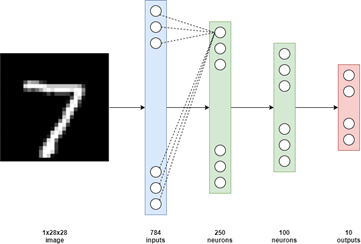

In [13]:
# code
mlp = MLPClassifier(hidden_layer_sizes=(250, 100), max_iter=1000)
# Train the model on the training set
mlp.fit(X_train, y_train)
# Evaluate the model on the test set
score = mlp.score(X_test, y_test)
print('Accuracy: %.2f%%' % (score * 100))

Accuracy: 97.78%


*   2.3. Find the best hyper parameters using **GridSearchCV**

In [18]:
#code
mlp = MLPClassifier(max_iter=3000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1]
}
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean cross-validation score: %.2f%%' % (grid_search.best_score_ * 100))

Best hyperparameters: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best mean cross-validation score: 97.70%


*   2.4. Compare the MultilayerPerceptron using the best hyper parameters in 2.3 and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

In [16]:
#code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', alpha=0.1, max_iter=3000)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
# Train and test each model
models = {'Multilayer Perceptron': mlp, 'Random Forest': rf, 'k-NN': knn, 'Naive Bayes': nb}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print('%s: Accuracy=%.2f%%, Precision=%.2f%%, Recall=%.2f%%, F1-score=%.2f%%' % (name, accuracy*100, precision*100, recall*100, f1*100))

Multilayer Perceptron: Accuracy=98.06%, Precision=97.99%, Recall=97.85%, F1-score=97.90%
Random Forest: Accuracy=98.61%, Precision=98.57%, Recall=98.70%, F1-score=98.62%
k-NN: Accuracy=99.44%, Precision=99.44%, Recall=99.45%, F1-score=99.44%
Naive Bayes: Accuracy=85.28%, Precision=87.81%, Recall=85.10%, F1-score=84.76%


#Task 3. With **spambase** dataset: 

*   3.1. Apply **GridSearchCV** to **MultilayperPerceptron** to find the best hyperparameters (the setting of hyperparameters chosen by students)

In [ ]:
#code

*   3.2. Compare the **MultilayerPerceptron** using the best hyper parameters in 3.1) and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.